In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [2]:
data = pd.read_csv('/kaggle/input/stock-dataset/apple.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8023 entries, 0 to 8022
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 8023 non-null   object 
 1   Open                 8023 non-null   float64
 2   High                 8023 non-null   float64
 3   Low                  8023 non-null   float64
 4   Close                8023 non-null   float64
 5   Volume               8023 non-null   int64  
 6   Dividends            8023 non-null   float64
 7   Stock Splits         8023 non-null   float64
 8   pct_change_APPLE     8023 non-null   float64
 9   log_change_APPLE     8023 non-null   float64
 10  7ma_APPLE            8023 non-null   float64
 11  14ma_APPLE           8023 non-null   float64
 12  21ma_APPLE           8023 non-null   float64
 13  7macd_APPLE          8023 non-null   float64
 14  14macd_APPLE         8023 non-null   float64
 15  7rsi_APPLE           8023 non-null   f

In [3]:
data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,pct_change_APPLE,log_change_APPLE,...,fft_imag_APPLE,fft_magnitude_APPLE,fft_phase_APPLE,IBM_close,INTC_close,MSFT_close,QCOM_close,SPY_close,TXN_close,target
0,1993-01-29 00:00:00-05:00,0.437044,0.444298,0.427977,0.431604,266100800,0.0,0.0,-0.006262,-0.006282,...,132.036219,168.661148,2.242361,5.968116,1.864437,1.663400,0.571041,24.608606,2.008653,0.444298
1,1993-02-01 00:00:00-05:00,0.429790,0.444298,0.429790,0.444298,240553600,0.0,0.0,0.029412,0.028987,...,130.967677,171.784995,2.274590,6.098490,1.943032,1.682631,0.585560,24.783651,2.096996,0.437044
2,1993-02-02 00:00:00-05:00,0.440671,0.446111,0.437044,0.437044,182336000,0.0,0.0,-0.016327,-0.016462,...,126.687728,167.929433,2.286837,6.040542,1.943032,1.711476,0.602497,24.836142,2.073748,0.435230
3,1993-02-03 00:00:00-05:00,0.442485,0.442485,0.424349,0.435230,264185600,0.0,0.0,-0.004150,-0.004158,...,131.123964,172.790223,2.280028,5.924657,1.901552,1.699458,0.629113,25.098701,2.064448,0.431604
4,1993-02-04 00:00:00-05:00,0.435231,0.437044,0.427977,0.431604,208152000,0.0,0.0,-0.008332,-0.008367,...,128.484826,177.681239,2.333284,6.017185,1.908101,1.634555,0.677507,25.203697,2.064448,0.415283
5,1993-02-05 00:00:00-05:00,0.429790,0.431604,0.408029,0.415283,367617600,0.0,0.0,-0.037815,-0.038548,...,116.593347,173.086702,2.402507,6.090388,1.866620,1.711476,0.648471,25.186211,1.999355,0.409842
6,1993-02-08 00:00:00-05:00,0.413470,0.417096,0.402589,0.409842,281075200,0.0,0.0,-0.013102,-0.013188,...,106.593147,164.719000,2.437790,6.192873,1.853522,1.648979,0.701703,25.186211,1.962156,0.412563
7,1993-02-09 00:00:00-05:00,0.413470,0.416190,0.409842,0.412563,238660800,0.0,0.0,0.006639,0.006617,...,95.867877,157.314660,2.486286,6.251430,1.929933,1.612923,0.677507,25.011187,1.911010,0.404402
8,1993-02-10 00:00:00-05:00,0.413470,0.415283,0.398961,0.404402,268284800,0.0,0.0,-0.019781,-0.019979,...,78.697727,132.996483,2.508392,6.119667,1.999795,1.644171,0.643631,25.046188,1.985404,0.399869
9,1993-02-11 00:00:00-05:00,0.404402,0.408029,0.398961,0.399869,168268800,0.0,0.0,-0.011210,-0.011273,...,87.751189,119.960438,2.321072,5.987905,1.962681,1.639363,0.638792,25.168707,1.990055,0.391653


In [4]:
data.drop(['Date'], axis=1, inplace=True)

In [5]:
import numpy as np
import pandas as pd

data = data.iloc[:8000]
data['y'] = data['target']

x = data.drop(columns=['y']).values
y = data['y'].values



split = int(data.shape[0] * 0.95)
train_x, test_x = x[:split, :], x[split:, :]
train_y, test_y = y[:split], y[split:]

print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')

print(train_y)


trainX: (7600, 40) trainY: (7600,)
testX: (400, 40) testY: (400,)
[  0.44429803   0.43704391   0.43523034 ... 164.6918335  164.15663147
 162.30325317]


In [6]:
import numpy as np

print("Kiểm tra NaN trong train_x:", np.isnan(train_x).any())
print("Kiểm tra Inf trong train_x:", np.isinf(train_x).any())


Kiểm tra NaN trong train_x: False
Kiểm tra Inf trong train_x: True


In [7]:
train_x = np.nan_to_num(train_x, nan=0.0, posinf=1e10, neginf=-1e10)
test_x = np.nan_to_num(test_x, nan=0.0, posinf=1e10, neginf=-1e10)


In [8]:

x_scaler = MinMaxScaler(feature_range = (0, 1))
y_scaler = MinMaxScaler(feature_range = (0, 1))

train_x = x_scaler.fit_transform(train_x)
test_x = x_scaler.transform(test_x)

train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
test_y = y_scaler.transform(test_y.reshape(-1, 1))

In [9]:
print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')

print(train_y)


trainX: (7600, 40) trainY: (7600, 1)
testX: (400, 40) testY: (400, 1)
[[0.00193798]
 [0.00189745]
 [0.00188731]
 ...
 [0.91962882]
 [0.91663852]
 [0.90628324]]


In [10]:
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )

        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        )

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

In [11]:
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_x).float()), batch_size = 128, shuffle = False)
model = VAE([40, 400, 400, 400, 10], 10)

[1/90] Loss: 2078.0434522628784
[2/90] Loss: 2025.9027223587036
[3/90] Loss: 1970.2314291000366
[4/90] Loss: 1821.6030893325806
[5/90] Loss: 1655.2574663162231
[6/90] Loss: 1548.8250370025635
[7/90] Loss: 1483.191204071045
[8/90] Loss: 1364.7281160354614
[9/90] Loss: 1314.841368675232
[10/90] Loss: 1226.8995351791382
[11/90] Loss: 1147.971393108368
[12/90] Loss: 1096.1311416625977
[13/90] Loss: 994.524076461792
[14/90] Loss: 952.2602572441101
[15/90] Loss: 930.7510027885437
[16/90] Loss: 834.210880279541
[17/90] Loss: 784.987783908844
[18/90] Loss: 732.927134513855
[19/90] Loss: 675.4033436775208
[20/90] Loss: 671.7843952178955
[21/90] Loss: 628.8848443031311
[22/90] Loss: 560.4164800643921
[23/90] Loss: 533.0162253379822
[24/90] Loss: 504.5616993904114
[25/90] Loss: 445.306658744812
[26/90] Loss: 426.53566217422485
[27/90] Loss: 421.11047315597534
[28/90] Loss: 403.32660245895386
[29/90] Loss: 371.0815062522888
[30/90] Loss: 334.77505922317505
[31/90] Loss: 309.61562633514404
[32/90] 

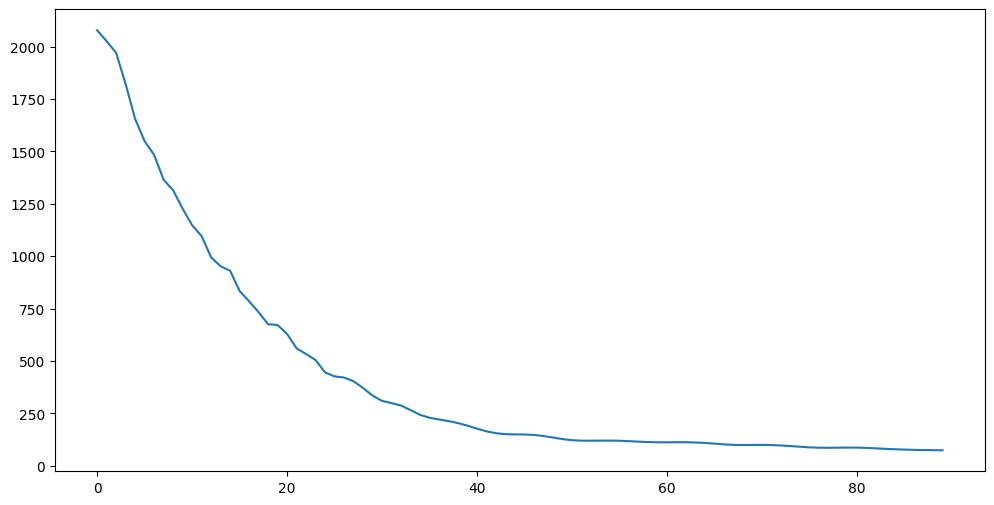

In [12]:
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
num_epochs = 90
learning_rate = 0.00003
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

hist = np.zeros(num_epochs)
for epoch in range(num_epochs):
    total_loss = 0
    loss_ = []
    for (x, ) in train_loader:
        x = x.to(device)
        output, z, mu, logVar = model(x)
        kl_divergence = 0.5* torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
        loss = F.binary_cross_entropy(output, x) + kl_divergence
        loss.backward()
        optimizer.step()
        loss_.append(loss.item())
    hist[epoch] = sum(loss_)
    print('[{}/{}] Loss:'.format(epoch+1, num_epochs), sum(loss_))

plt.figure(figsize=(12, 6))
plt.plot(hist)

In [13]:
model.eval()
_, VAE_train_x, train_x_mu, train_x_var = model(torch.from_numpy(train_x).float().to(device))
_, VAE_test_x, test_x_mu, test_x_var = model(torch.from_numpy(test_x).float().to(device))

In [14]:
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    for i in range(window, x.shape[0]):
        tmp_x = x[i - window: i, :]
        tmp_y = y[i]
        tmp_y_gan = y[i - window: i + 1]
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan

In [15]:
train_x = np.concatenate((train_x, VAE_train_x.cpu().detach().numpy()), axis = 1)
test_x = np.concatenate((test_x, VAE_test_x.cpu().detach().numpy()), axis = 1)

In [16]:
train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, train_y, 3)
test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')
print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')


train_x: torch.Size([7597, 3, 50]) train_y: torch.Size([7597, 1]) train_y_gan: torch.Size([7597, 4, 1])
test_x: torch.Size([397, 3, 50]) test_y: torch.Size([397, 1]) test_y_gan: torch.Size([397, 4, 1])


In [17]:
class Generator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.gru_1 = nn.GRU(input_size, 1024, batch_first = True)
        self.gru_2 = nn.GRU(1024, 512, batch_first = True)
        self.gru_3 = nn.GRU(512, 256, batch_first = True)
        self.linear_1 = nn.Linear(256, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        use_cuda = 1
        device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
        h0 = torch.zeros(1, x.size(0), 1024).to(device)
        out_1, _ = self.gru_1(x, h0)
        out_1 = self.dropout(out_1)
        h1 = torch.zeros(1, x.size(0), 512).to(device)
        out_2, _ = self.gru_2(out_1, h1)
        out_2 = self.dropout(out_2)
        h2 = torch.zeros(1, x.size(0), 256).to(device)
        out_3, _ = self.gru_3(out_2, h2)
        out_3 = self.dropout(out_3)
        out_4 = self.linear_1(out_3[:, -1, :])
        out_5 = self.linear_2(out_4)
        out = self.linear_3(out_5)
        return out

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4, 32, kernel_size = 9, stride = 1, padding = 'same')
        self.conv2 = nn.Conv1d(32, 64, kernel_size = 9, stride = 1, padding = 'same')
        self.conv3 = nn.Conv1d(64, 128, kernel_size = 9, stride = 1, padding = 'same')
        self.linear1 = nn.Linear(128, 220)
        self.batch1 = nn.BatchNorm1d(220)
        self.linear2 = nn.Linear(220, 220)
        self.batch2 = nn.BatchNorm1d(220)
        self.linear3 = nn.Linear(220, 1)
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1 = self.leaky(conv1)
        conv2 = self.conv2(conv1)
        conv2 = self.leaky(conv2)
        conv3 = self.conv3(conv2)
        conv3 = self.leaky(conv3)
        flatten_x = conv3.reshape(conv3.shape[0], conv3.shape[1])
        out_1 = self.linear1(flatten_x)
        out_1 = self.leaky(out_1)
        out_2 = self.linear2(out_1)
        out_2 = self.relu(out_2)
        out_3 = self.linear3(out_2)
        out = self.sigmoid(out_3)
        return out

In [18]:
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

batch_size = 256
learning_rate = 0.00016
num_epochs = 150
patience = 10  # Số epoch chờ trước khi dừng sớm
min_delta = 1e-4  # Tối thiểu cải thiện được coi là tiến bộ
best_lossG = float('inf')
wait = 0  # Đếm số lần chờ cải thiện

trainDataloader = DataLoader(TensorDataset(train_x_slide, train_y_gan), batch_size=batch_size, shuffle=True)

modelG = Generator(50).to(device)
modelD = Discriminator().to(device)

criterion = nn.BCELoss()
optimizerG = torch.optim.Adam(modelG.parameters(), lr=learning_rate, betas=(0.0, 0.9))
optimizerD = torch.optim.Adam(modelD.parameters(), lr=learning_rate, betas=(0.0, 0.9))

histG = np.zeros(num_epochs)
histD = np.zeros(num_epochs)

for epoch in range(num_epochs):
    loss_G = []
    loss_D = []
    for (x, y) in trainDataloader:
        x = x.to(device)
        y = y.to(device)

        # Generator tạo dữ liệu giả
        fake_data = modelG(x)
        fake_data = torch.cat([y[:, :3, :], fake_data.reshape(-1, 1, 1)], axis=1)

        # Tính tổn thất cho Discriminator
        dis_real_output = modelD(y)
        real_labels = torch.ones_like(dis_real_output).to(device)
        lossD_real = criterion(dis_real_output, real_labels)

        dis_fake_output = modelD(fake_data)
        fake_labels = torch.zeros_like(real_labels).to(device)
        lossD_fake = criterion(dis_fake_output, fake_labels)

        lossD = lossD_real + lossD_fake

        modelD.zero_grad()
        lossD.backward(retain_graph=True)
        optimizerD.step()
        loss_D.append(lossD.item())

        # Tính tổn thất cho Generator
        output_fake = modelD(fake_data)
        lossG = criterion(output_fake, real_labels)
        modelG.zero_grad()
        lossG.backward()
        optimizerG.step()
        loss_G.append(lossG.item())

    # Cập nhật lịch sử loss
    histG[epoch] = sum(loss_G)
    histD[epoch] = sum(loss_D)
    print(f'[{epoch+1}/{num_epochs}] LossD: {sum(loss_D):.4f} LossG:{sum(loss_G):.4f}')

    # Kiểm tra Early Stopping
    if histG[epoch] + min_delta < best_lossG:
        best_lossG = histG[epoch]
        wait = 0  # Reset thời gian chờ khi có cải thiện
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping at epoch {epoch + 1}. No improvement for {patience} epochs.")
            break


[1/150] LossD: 41.5889 LossG:20.7935
[2/150] LossD: 41.5888 LossG:20.7958
[3/150] LossD: 41.5888 LossG:20.7944
[4/150] LossD: 41.5888 LossG:20.7946
[5/150] LossD: 41.5888 LossG:20.7945
[6/150] LossD: 41.5888 LossG:20.7945
[7/150] LossD: 41.5888 LossG:20.7946
[8/150] LossD: 41.5888 LossG:20.7947
[9/150] LossD: 41.5887 LossG:20.7948
[10/150] LossD: 41.5887 LossG:20.7947
[11/150] LossD: 41.5885 LossG:20.7952
Early stopping at epoch 11. No improvement for 10 epochs.


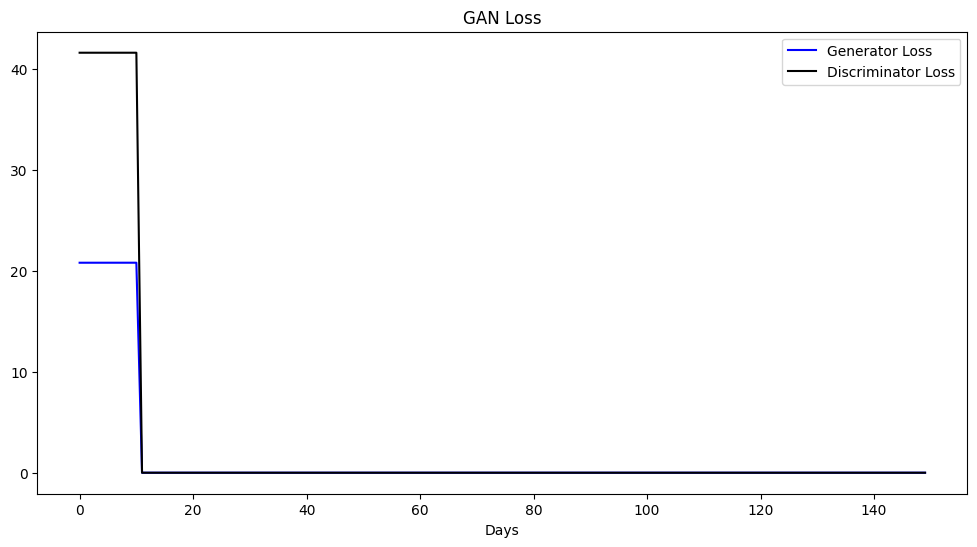

In [21]:
modelG.eval()
pred_y_train = modelG(train_x_slide.to(device))
pred_y_test = modelG(test_x_slide.to(device))

y_train_true = y_scaler.inverse_transform(train_y_slide)
y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_true = y_scaler.inverse_transform(test_y_slide)
y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

Training dataset RMSE:4.174827315253623


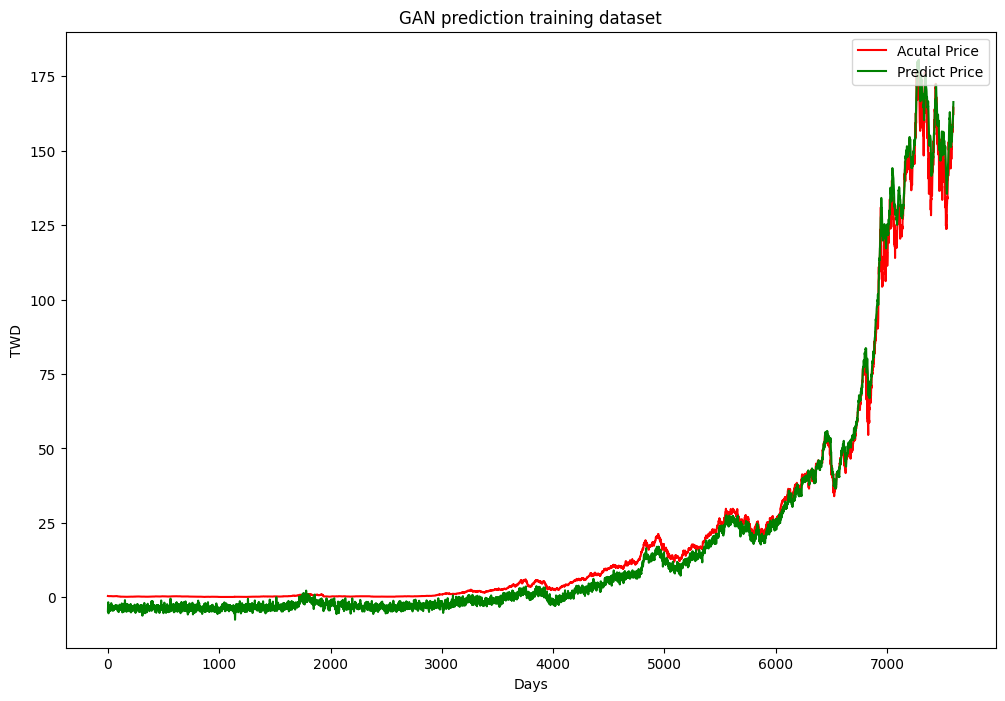

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(y_train_true, color = 'red', label = 'Acutal Price')
plt.plot(y_train_pred, color = 'green', label = 'Predict Price')
plt.title('GAN prediction training dataset')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

Training dataset RMSE:6.191370533048044


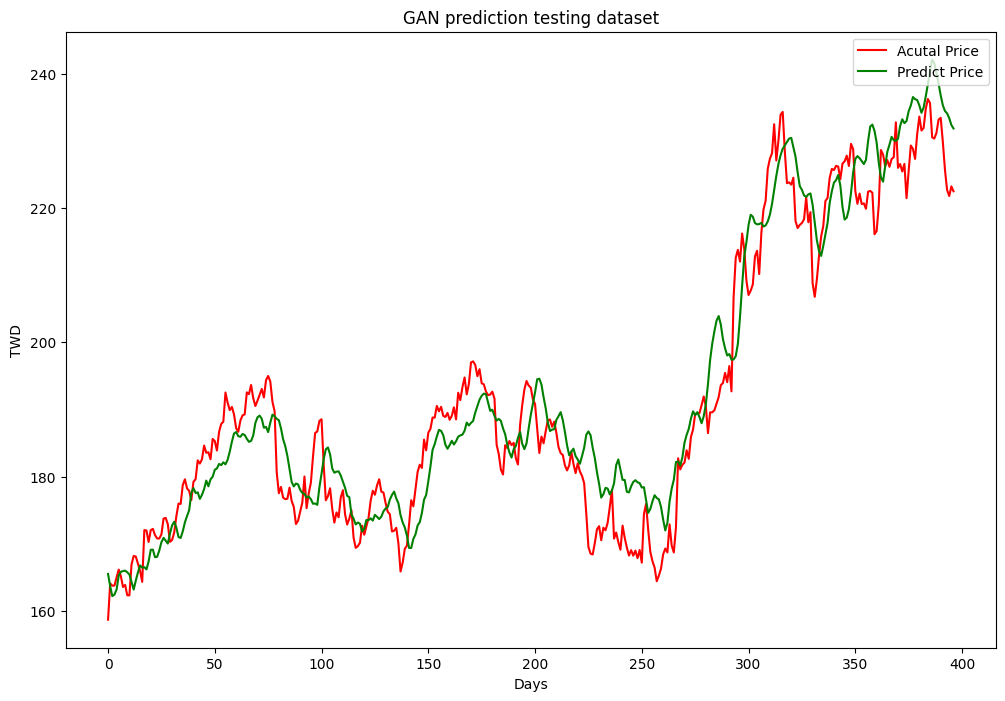

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(y_test_true, color = 'red', label = 'Acutal Price')
plt.plot(y_test_pred, color = 'green', label = 'Predict Price')
plt.title('GAN prediction testing dataset')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend(loc = 'upper right')


MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')